In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from scipy.special import kl_div
from typing import Union, Tuple, Dict
from scipy.spatial.distance import jensenshannon
from sklearn.model_selection import train_test_split

In [2]:
BASE = "/mnt/data/kgutjahr/datasets/DVM"
TABLES= os.path.join(BASE, "tables")
FEATURES = os.path.join(BASE, "images")

In [3]:
color_coding = {0: 'Beige',
                1: 'Black',
                2: 'Blue', 
                3: 'Bronze', 
                4: 'Brown', 
                5: 'Burgundy', 
                6: 'Gold', 
                7: 'Green', 
                8: 'Grey', 
                9: 'Indigo', 
                10: 'Magenta', 
                11: 'Maroon', 
                12: 'Multicolour', 
                13: 'Navy', 
                14: 'Orange', 
                15: 'Pink', 
                16: 'Purple', 
                17: 'Red', 
                18: 'Silver', 
                19: 'Turquoise', 
                20: 'White', 
                21: 'Yellow'}

In [4]:
label_coding = {0: 'Bentley Bentayga',
 1: 'Bentley Continental',
 2: 'Chevrolet Spark',
 3: 'Citroen C3 Picasso',
 4: 'Citroen C4',
 5: 'Citroen C4 Cactus',
 6: 'Citroen C4 Picasso',
 7: 'Citroen C5',
 8: 'Citroen Grand C4 Picasso',
 9: 'Citroen Xsara Picasso',
 10: 'Citroen C1',
 11: 'Citroen C2',
 12: 'Citroen C3',
 13: 'Citroen C3 Aircross',
 14: 'Citroen DS3',
 15: 'Citroen DS4',
 16: 'Citroen DS5',
 17: 'Dacia Duster',
 18: 'Dacia Sandero',
 19: 'Ferrari 488',
 20: 'Fiat Bravo',
 21: 'Fiat Doblo',
 22: 'Fiat Grande Punto',
 23: 'Fiat Panda',
 24: 'Fiat Punto',
 26: 'Fiat 500',
 25: 'Fiat Punto Evo',
 27: 'Fiat Tipo',
 28: 'Fiat 500L',
 29: 'Fiat 500X',
 30: 'Ford B-Max',
 31: 'Ford Fiesta',
 32: 'Ford Focus',
 33: 'Ford Focus C-Max',
 34: 'Ford Fusion',
 35: 'Ford Galaxy',
 37: 'Ford C-Max',
 36: 'Ford Grand C-Max',
 38: 'Ford Ka',
 39: 'Ford Kuga',
 40: 'Ford Mondeo',
 41: 'Ford Mustang',
 42: 'Ford S-Max',
 43: 'Ford EcoSport',
 44: 'Ford Edge',
 45: 'Abarth 595',
 46: 'Honda Accord',
 47: 'Honda Jazz',
 48: 'Honda Civic',
 49: 'Honda CR-V',
 50: 'Honda HR-V',
 51: 'Honda Insight',
 52: 'Hyundai i30',
 53: 'Hyundai i40',
 54: 'Hyundai i800',
 55: 'Hyundai ix20',
 56: 'Hyundai ix35',
 57: 'Hyundai Santa Fe',
 58: 'Hyundai Tucson',
 59: 'Hyundai Getz',
 60: 'Hyundai i10',
 61: 'Hyundai i20',
 62: 'Infiniti Q30',
 63: 'Jaguar F-PACE',
 64: 'Jaguar F-Type',
 65: 'Jaguar S-Type',
 66: 'Jaguar X-Type',
 67: 'Jaguar XE',
 68: 'Jaguar XF',
 69: 'Jaguar XJ',
 70: 'Jaguar XK',
 71: 'Jeep Cherokee',
 72: 'Jeep Grand Cherokee',
 73: 'Jeep Renegade',
 74: 'Kia Carens',
 75: 'Kia Sorento',
 76: 'Kia Soul',
 77: 'Kia Sportage',
 78: 'Kia Venga',
 79: "Kia 'Cee''d'",
 80: 'Kia Niro',
 81: 'Kia Optima',
 82: 'Kia Picanto',
 83: "Kia 'Pro_Cee''d'",
 84: 'Kia Rio',
 85: 'Land Rover Discovery Sport',
 86: 'Land Rover Freelander',
 87: 'Land Rover Range Rover',
 88: 'Land Rover Range Rover Evoque',
 89: 'Land Rover Range Rover Sport',
 90: 'Land Rover Range Rover Velar',
 91: 'Land Rover Discovery',
 92: 'Lexus NX 300h',
 93: 'Lexus GS 250',
 94: 'Lexus RX 200t',
 95: 'Lexus IS 250',
 96: 'Alfa Romeo Giulietta',
 97: 'Alfa Romeo MiTo',
 98: 'MG MG3',
 99: 'MG TF',
 100: 'MINI Clubman',
 101: 'MINI Convertible',
 102: 'MINI Countryman',
 103: 'MINI Coupe',
 104: 'MINI Hatch',
 105: 'MINI Paceman',
 106: 'MINI Roadster',
 107: 'Maserati Ghibli',
 108: 'Mazda Mazda2',
 109: 'Mazda Mazda3',
 110: 'Mazda Mazda5',
 111: 'Mazda Mazda6',
 112: 'Mazda CX-3',
 113: 'Mazda CX-5',
 114: 'Mercedes-Benz B Class',
 115: 'Mercedes-Benz C Class',
 116: 'Mercedes-Benz CLA Class',
 117: 'Mercedes-Benz CLC Class',
 118: 'Mercedes-Benz CLK',
 119: 'Mercedes-Benz CLS',
 120: 'Mercedes-Benz E Class',
 121: 'Mercedes-Benz GLA Class',
 122: 'Mercedes-Benz GLC Class',
 123: 'Mercedes-Benz GLE Class',
 124: 'Mercedes-Benz M Class',
 125: 'Mercedes-Benz S Class',
 126: 'Mercedes-Benz SL Class',
 127: 'Mercedes-Benz SLK',
 128: 'Mercedes-Benz A Class',
 129: 'Mitsubishi ASX',
 130: 'Mitsubishi Lancer',
 131: 'Mitsubishi Mirage',
 132: 'Mitsubishi Outlander',
 133: 'Mitsubishi Shogun',
 134: 'Mitsubishi Colt',
 135: 'Mitsubishi Eclipse Cross',
 136: 'Nissan GT-R',
 137: 'Nissan Juke',
 138: 'Nissan Micra',
 139: 'Nissan Note',
 140: 'Nissan Pulsar',
 141: 'Nissan Qashqai',
 142: 'Nissan Qashqai+2',
 143: 'Nissan X-Trail',
 144: 'Peugeot 208',
 145: 'Peugeot 3008',
 146: 'Peugeot 308',
 147: 'Peugeot 5008',
 148: 'Peugeot 508',
 149: 'Peugeot 107',
 150: 'Peugeot Partner Tepee',
 151: 'Peugeot RCZ',
 152: 'Peugeot 108',
 153: 'Peugeot 2008',
 154: 'Peugeot 206',
 155: 'Peugeot 207',
 156: 'Porsche Macan',
 157: 'Porsche Panamera',
 158: 'Porsche 718 Cayman',
 159: 'Porsche 911',
 160: 'Porsche Boxster',
 161: 'Porsche Cayenne',
 162: 'Porsche Cayman',
 164: 'Renault Captur',
 163: 'Renault Koleos',
 165: 'Renault Laguna',
 166: 'Renault Megane',
 167: 'Renault Scenic',
 168: 'Renault Twingo',
 169: 'Renault Clio',
 170: 'Renault Grand Modus',
 171: 'Renault Grand Scenic',
 172: 'Renault Kadjar',
 174: 'SEAT Alhambra',
 173: 'SEAT Leon',
 175: 'SEAT Mii',
 176: 'SEAT Altea',
 177: 'SEAT Ateca',
 178: 'SEAT Exeo',
 179: 'SEAT Ibiza',
 180: 'Audi A1',
 181: 'Audi A6 Allroad',
 182: 'Audi A7',
 183: 'Audi A8',
 184: 'Audi Q2',
 185: 'Audi Q3',
 186: 'Audi Q5',
 187: 'Audi Q7',
 188: 'Audi R8',
 189: 'Audi A3',
 190: 'Audi TT',
 191: 'Audi A4',
 192: 'Audi A5',
 194: 'SKODA Citigo',
 193: 'SKODA Yeti',
 195: 'SKODA Fabia',
 196: 'SKODA Karoq',
 197: 'SKODA Kodiaq',
 198: 'SKODA Octavia',
 199: 'SKODA Rapid',
 200: 'SKODA Roomster',
 201: 'SKODA Superb',
 202: 'Saab 09-Mar',
 203: 'Saab 09-May',
 204: 'Smart forfour',
 205: 'Smart fortwo',
 206: 'Ssangyong Korando',
 207: 'Ssangyong Tivoli',
 208: 'Subaru XV',
 209: 'Subaru Forester',
 210: 'Subaru Impreza',
 211: 'Subaru Outback',
 213: 'Suzuki Alto',
 212: 'Suzuki Swift',
 214: 'Suzuki SX4',
 215: 'Suzuki SX4 S-Cross',
 216: 'Suzuki Vitara',
 217: 'Suzuki Baleno',
 218: 'Suzuki Celerio',
 219: 'Suzuki Grand Vitara',
 220: 'Suzuki Splash',
 221: 'BMW 1 Series',
 222: 'BMW 7 Series',
 223: 'BMW 2 Series',
 224: 'BMW i8',
 225: 'BMW X1',
 226: 'BMW X3',
 227: 'BMW X4',
 228: 'BMW X5',
 229: 'BMW X6',
 230: 'BMW Z4',
 231: 'BMW 3 Series',
 232: 'BMW 5 Series',
 233: 'Toyota Corolla',
 234: 'Toyota iQ',
 235: 'Toyota Land Cruiser',
 237: 'Toyota Auris',
 236: 'Toyota Prius',
 238: 'Toyota RAV4',
 240: 'Toyota Avensis',
 239: 'Toyota Verso',
 241: 'Toyota Yaris',
 242: 'Toyota AYGO',
 243: 'Toyota C-HR',
 245: 'Vauxhall ADAM',
 244: 'Vauxhall Crossland X',
 246: 'Vauxhall Grandland X',
 247: 'Vauxhall Insignia',
 248: 'Vauxhall Meriva',
 249: 'Vauxhall Mokka',
 250: 'Vauxhall Agila',
 251: 'Vauxhall Tigra',
 252: 'Vauxhall Vectra',
 253: 'Vauxhall Viva',
 254: 'Vauxhall Zafira',
 255: 'Vauxhall Antara',
 256: 'Vauxhall Astra',
 257: 'Vauxhall Corsa',
 258: 'Volkswagen CC',
 259: 'Volkswagen Eos',
 260: 'Volkswagen Fox',
 261: 'Volkswagen Golf',
 262: 'Volkswagen Jetta',
 263: 'Volkswagen Passat',
 264: 'Volkswagen Polo',
 265: 'Volkswagen Scirocco',
 266: 'Volkswagen Sharan',
 267: 'Volkswagen T-Roc',
 268: 'Volkswagen Tiguan',
 269: 'Volkswagen Touareg',
 270: 'Volkswagen Touran',
 271: 'Volkswagen Beetle',
 272: 'Volkswagen up!',
 274: 'Volvo C30',
 273: 'Volvo V60',
 275: 'Volvo V70',
 276: 'Volvo XC60',
 277: 'Volvo XC70',
 278: 'Volvo XC90',
 279: 'Volvo C70',
 280: 'Volvo S40',
 281: 'Volvo S60',
 282: 'Volvo S80',
 283: 'Volvo S90',
 284: 'Volvo V40',
 285: 'Volvo V50'}

In [131]:
def get_color_counts(df: pd.DataFrame) -> pd.DataFrame:
    color_counts = df["Color"].value_counts()
    color_percentages = df["Color"].value_counts(normalize=True) * 100

    # Optional: Combine into one DataFrame for clarity
    color_summary = pd.DataFrame({
        'Count': color_counts,
        'Percentage': color_percentages.round(3)
    })
    return color_summary

In [6]:
def plot_color_distributions(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    ax = df["Count"].plot(kind='bar', color='skyblue', edgecolor='black', width=1)

    # Customize the plot
    plt.title('Color distribution')
    plt.xlabel('Colors')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, fontsize=10)  # Rotate labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get color distribution of entire Dataset

In [69]:
data_path = os.path.join(FEATURES, "filtered_data_df.csv")
full_data_df = pd.read_csv(data_path)
full_data_df = full_data_df.loc[:, ~full_data_df.columns.str.contains('^Unnamed')]
full_data_df['Color'] = full_data_df['Color'].map(color_coding)
full_data_df

,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
0,10_3$$1,0.012811,-1.311853,0.876887,-0.906021,6.323766,0.135216,0.61833,6.285820,5.331307,Grey,10,0,8,0,Bentley$$Bentayga$$2016$$Grey$$10_3$$1$$image_...,225
1,10_3$$3,0.012811,-0.830929,0.876887,-0.848026,6.594044,0.135216,0.61833,6.285820,5.331307,Silver,10,0,8,0,Bentley$$Bentayga$$2016$$Silver$$10_3$$3$$imag...,225
2,10_3$$10,0.012811,0.130919,0.876887,-0.815638,6.210746,0.135216,0.61833,6.285820,5.331307,Blue,10,0,8,0,Bentley$$Bentayga$$2016$$Blue$$10_3$$10$$image...,225
3,10_3$$11,0.012811,0.611842,0.876887,-0.823261,6.108246,0.135216,0.61833,6.285820,5.331307,White,10,0,8,0,Bentley$$Bentayga$$2016$$White$$10_3$$11$$imag...,0
4,10_3$$12,0.012811,0.130919,0.876887,-1.061788,7.133519,0.135216,0.61833,6.285820,5.331307,Grey,10,0,8,0,Bentley$$Bentayga$$2016$$Grey$$10_3$$12$$image...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176409,96_9$$353,0.012811,-0.350005,-1.900760,1.145516,-0.581038,0.135216,0.61833,-0.204064,0.666012,Silver,4,0,8,285,Volvo$$V50$$2004$$Silver$$96_9$$353$$image_0.jpg,45
176410,96_9$$374,0.012811,-0.350005,-1.900760,2.282258,-0.610655,0.135216,0.61833,-0.204064,0.147646,Silver,4,1,1,285,Volvo$$V50$$2004$$Silver$$96_9$$374$$image_0.jpg,0
176411,96_9$$457,0.012811,-0.350005,-1.900760,1.093532,-0.473358,0.135216,0.61833,-0.204064,0.666012,Grey,4,0,8,285,Volvo$$V50$$2004$$Grey$$96_9$$457$$image_0.jpg,45
176412,96_9$$477,0.012811,-1.792777,-1.900760,2.357791,-0.608227,0.135216,0.61833,-0.204064,-0.111537,Grey,4,1,8,285,Volvo$$V50$$2004$$Grey$$96_9$$477$$image_0.jpg,315


In [8]:
color_counts = get_color_counts(df=full_data_df)
color_counts

,Count,Percentage
Black,34005,19.276
Silver,29902,16.950
Blue,27793,15.754
Grey,26150,14.823
White,23369,13.247
Red,19514,11.061
Green,3500,1.984
Brown,2300,1.304
Yellow,2233,1.266
Orange,1966,1.114


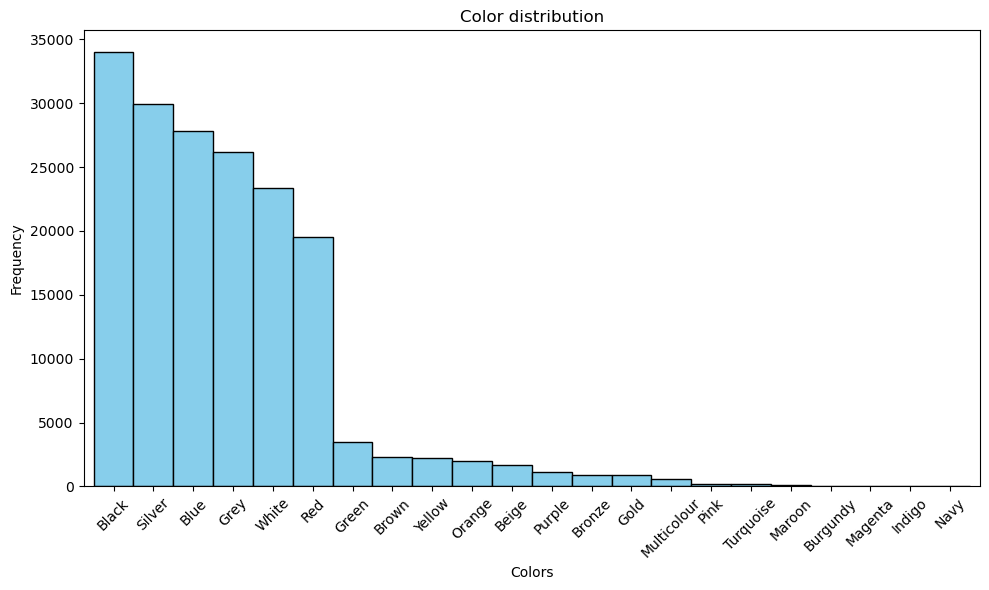

In [9]:
plot_color_distributions(df=color_counts)

## Plot Color Distribution of splits

In [10]:
train_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_train_noOH_all_views.csv'))
train_df['Color'] = train_df['Color'].map(color_coding)
val_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_val_noOH_all_views.csv'))
val_df['Color'] = val_df['Color'].map(color_coding)
test_df = pd.read_csv(os.path.join(FEATURES,f'dvm_full_features_test_noOH_all_views.csv'))
test_df['Color'] = test_df['Color'].map(color_coding)

In [11]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

print(f"Total Size: {train_df.shape[0] + val_df.shape[0] + test_df.shape[0]}")

(70565, 17)
(17642, 17)
(88207, 17)
Total Size: 176414


Relative Size between splits

### Training Split

In [12]:
train_color_counts = get_color_counts(df=train_df)
train_color_counts

,Count,Percentage
Black,13519,19.158
Silver,11977,16.973
Blue,11055,15.666
Grey,10509,14.893
White,9375,13.286
Red,7895,11.188
Green,1381,1.957
Brown,918,1.301
Yellow,895,1.268
Orange,786,1.114


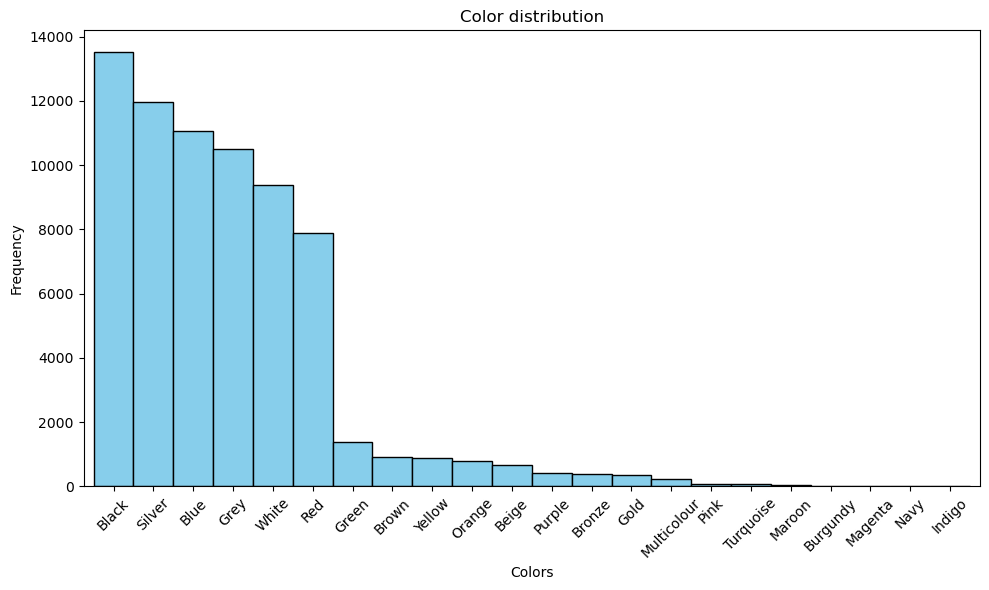

In [13]:
plot_color_distributions(df=train_color_counts)

### Validation Split

In [14]:
val_color_counts = get_color_counts(df=val_df)
val_color_counts

,Count,Percentage
Black,3469,19.663
Silver,3022,17.130
Blue,2823,16.002
Grey,2559,14.505
White,2318,13.139
Red,1843,10.447
Green,344,1.950
Yellow,235,1.332
Brown,233,1.321
Orange,202,1.145


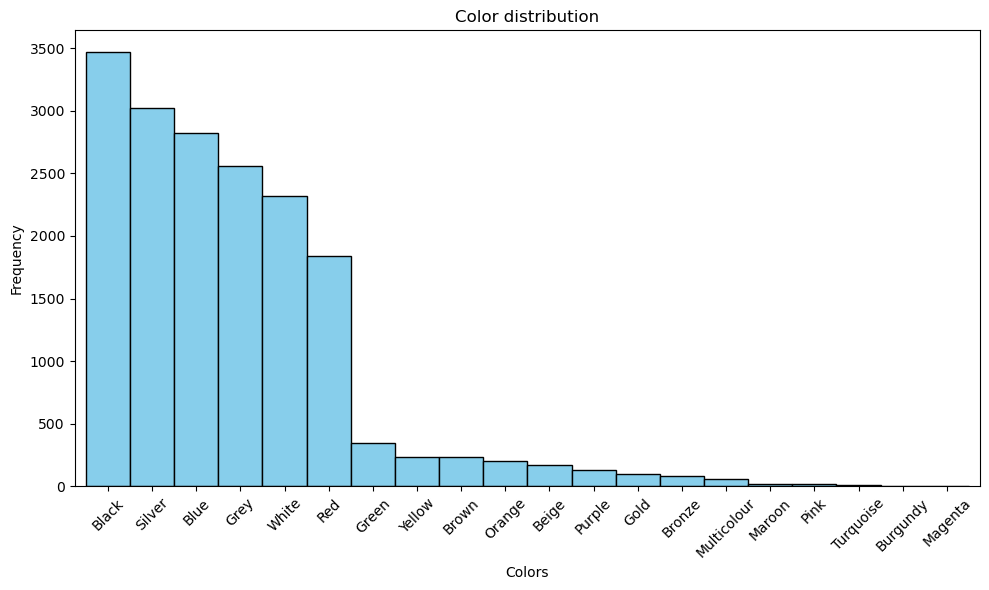

In [15]:
plot_color_distributions(df=val_color_counts)

### Test Split

In [16]:
test_color_counts = get_color_counts(df=test_df)
test_color_counts

,Count,Percentage
Black,17017,19.292
Silver,14903,16.895
Blue,13915,15.775
Grey,13082,14.831
White,11676,13.237
Red,9776,11.083
Green,1775,2.012
Brown,1149,1.303
Yellow,1103,1.250
Orange,978,1.109


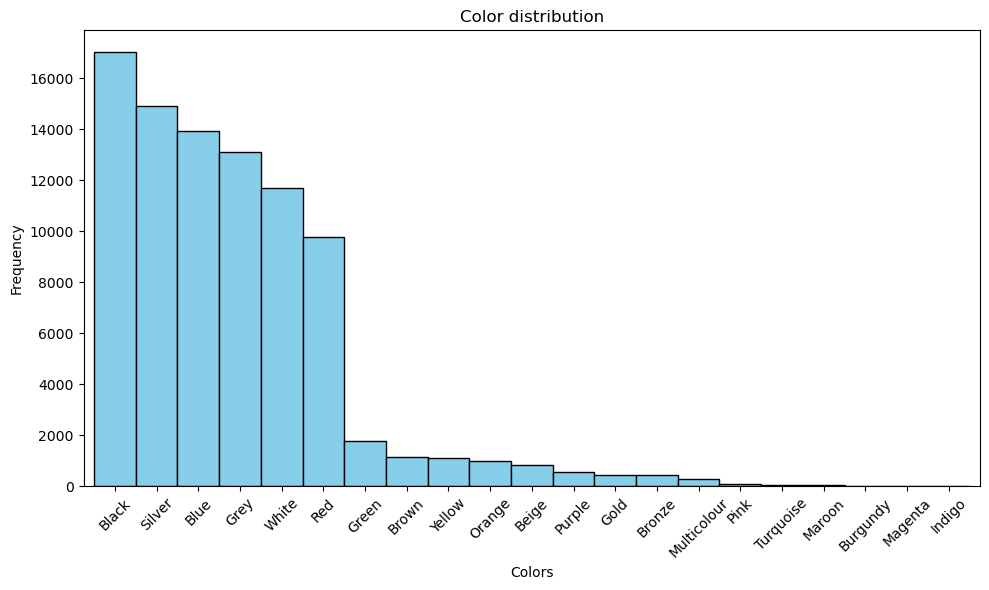

In [17]:
plot_color_distributions(df=test_color_counts)

## See if distributions are the same

In [18]:
def plot_compare_distribution(train_dist: Union[pd.Series, pd.DataFrame], val_dist: Union[pd.Series, pd.DataFrame], test_dist: Union[pd.Series, pd.DataFrame], colors: list[str]) -> None:
    plt.figure(figsize=(12, 6))
    plt.plot(colors, train_dist.reindex(colors), label='Train', marker='o')
    plt.plot(colors, val_dist.reindex(colors), label='Validation', marker='s')
    plt.plot(colors, test_dist.reindex(colors), label='Test', marker='^')
    plt.xticks(rotation=45)
    plt.ylabel('Relative Frequency')
    plt.title('Color Distribution Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
def calc_KL(first_dist: pd.DataFrame, second_dist: pd.DataFrame) -> np.ndarray:
    kl = np.sum(kl_div(first_dist, second_dist))
    return kl

In [20]:
def calc_JS(first_dist: pd.DataFrame, second_dist: pd.DataFrame) -> float:
    js = jensenshannon(first_dist, second_dist)
    return float(js)

In [21]:
colors = list(color_coding.values())

In [22]:
def fill_missing_vals(df: pd.DataFrame, fill_values: list[str]) -> pd.DataFrame:
    # fill missing color with 0 if it isn't present in distribution
    for fill in fill_values:
        if fill not in df:
            df[fill] = 0
    return df

In [23]:
train_dist = train_color_counts['Count'] / train_color_counts['Count'].sum()
val_dist = val_color_counts['Count'] / val_color_counts['Count'].sum()
test_dist = test_color_counts['Count'] / test_color_counts['Count'].sum()

#### Calculate Kullback-Leibler divergence

In [24]:
train_val_kl = calc_KL(first_dist=train_dist, second_dist=val_dist)
train_val_kl

0.0009321821806920966

In [25]:
train_test_kl = calc_KL(first_dist=train_dist, second_dist=test_dist)
train_test_kl

0.00016459560488363636

#### Calculate Jensen Shannonen divergence

In [26]:
train_df_filled = fill_missing_vals(df=train_dist, fill_values=colors)
val_df_filled = fill_missing_vals(df=val_dist, fill_values=colors)
train_val_js = calc_JS(first_dist=train_df_filled, second_dist=val_df_filled)
train_val_js

0.013530758435503982

In [27]:
test_df_filled = fill_missing_vals(df=test_dist, fill_values=colors)
train_test_js = calc_JS(first_dist=train_df_filled, second_dist=test_df_filled)
train_test_js

0.006184439960490339

#### Plot the distributions 

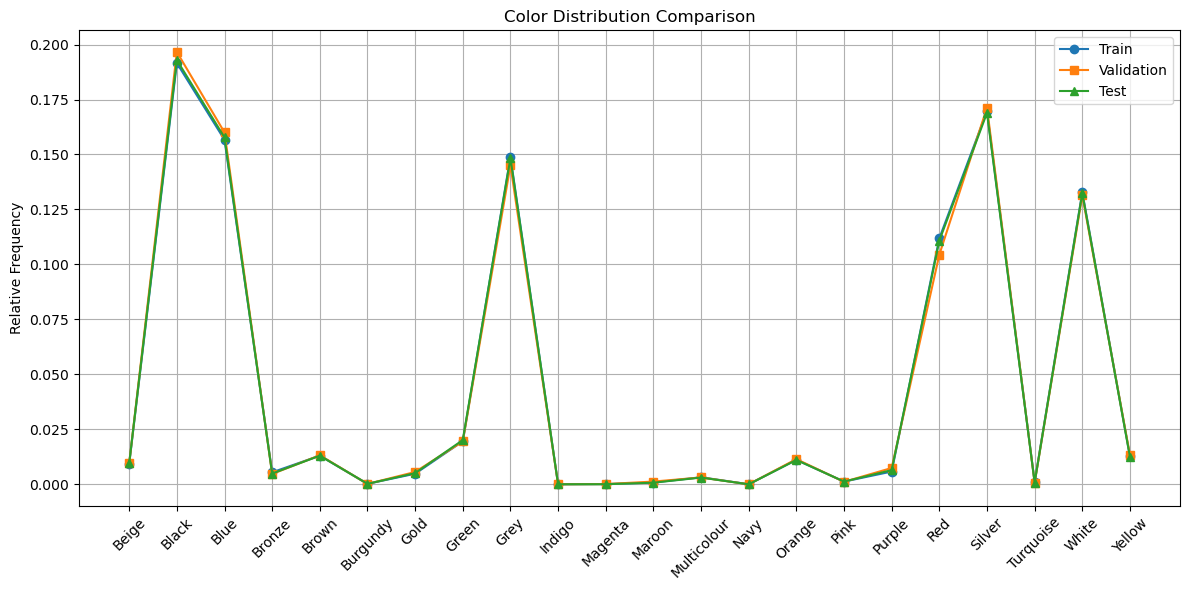

In [28]:
plot_compare_distribution(train_dist=train_dist, val_dist=val_dist, test_dist=test_dist, colors=colors)

# Create datasets that contain distribution shifts

In [29]:
def data_split(df, nclasses, split):
  critical_ids = df.groupby('Genmodel_ID', as_index=False).head(n=1)['Adv_ID']
  other_ids = df.loc[~df['Adv_ID'].isin(critical_ids)]['Adv_ID'].values
  to_fill_size = (int(len(df)*split)-len(critical_ids))
  stratify = None
  if to_fill_size >= nclasses:
    stratify = df.set_index('Adv_ID').loc[other_ids]['Genmodel_ID']
  if to_fill_size > 0:
    _, low_data_ids = train_test_split(other_ids, test_size=to_fill_size, random_state=2023, stratify=stratify)
  else:
    low_data_ids = []
  new_ids = np.concatenate([critical_ids,low_data_ids])
  return new_ids

In [73]:
def create_shift_mask(df: pd.DataFrame, filters: list[Dict[str, str]]) -> pd.Series:
    mask = pd.Series(True, index=df.index)  # Start with all True
    for f in filters:
        for col, val in f.items():
            mask &= df[col] == val
    return mask

In [123]:
def create_shifted_splits(df: pd.DataFrame, split: list[Dict[str, str]], ratio: list[float], mode: int = 0) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    '''
    Creates shifted versions of the given DataFrames.
    
    Args:
    -----
        df (pd.DataFrame): the original df
        split (list[Dict[str, str]]): The elements that needs to be filtered
        ratio (list[float]): Expects a list containing two float numbers:
                                first: validation size
                                scond: test size
        mode (int): The mode, i.e. if the newly generated test df should contain all split elements and train/val contain everything else (mode==0) or vice versa (mode==1) 
    '''
    mask = create_shift_mask(df=df, filters=split)
    
    no_df = df[~mask]
    only_df = df[mask]
 
    if mode == 0:
        test_df = only_df
        
        desired_train_val_size = int(len(test_df) * (1 / ratio[1] - 1))
        desired_train_val_size = min(desired_train_val_size, len(no_df)-1)
        x = desired_train_val_size / len(no_df)
        
        no_ids = data_split(df=no_df, nclasses=286, split=x)
        no_data_df = no_df.loc[no_df['Adv_ID'].isin(no_ids)]
        
        desired_val_size = int((len(no_data_df) + len(test_df)) * ratio[0])
        desired_val_size = min(desired_val_size, len(no_data_df))
        
        x_val = desired_val_size / len(no_data_df)
     
        val_ids = data_split(df=no_data_df, nclasses=286, split=x_val)
        val_df = no_data_df.loc[no_data_df['Adv_ID'].isin(val_ids)]
        train_df = no_data_df.loc[~no_data_df['Adv_ID'].isin(val_ids)]
    elif mode == 1:
        desired_test_size = int((ratio[1] / (1 - ratio[1])) * len(only_df))
        desired_test_size = min(desired_test_size, len(no_df)-1)
        x = desired_test_size / len(no_df)
        
        only_test_ids = data_split(df=no_df, nclasses=286, split=x)
        test_df = no_df.loc[no_df['Adv_ID'].isin(only_test_ids)]
        
        desired_val_size = int((len(no_df) + len(only_df)) * ratio[0])
        desired_val_size = min(desired_val_size, len(only_df)-1)
        
        x_val = desired_val_size / len(only_df)
     
        val_ids = data_split(df=only_df, nclasses=286, split=x_val)
        val_df = only_df.loc[only_df['Adv_ID'].isin(val_ids)]
        train_df = only_df.loc[~only_df['Adv_ID'].isin(val_ids)]
    else:
        raise ValueError("mode can only be 0 or 1.")  
    
    print(f"Shape of train df:\t{train_df.shape}")
    print(f"Shape of val df:\t{val_df.shape}")
    print(f"Shape of test df:\t{test_df.shape}")
    print(f"Total Size: {train_df.shape[0] + val_df.shape[0] + test_df.shape[0]}")
    
    return train_df, val_df, test_df

In [139]:
def create_dist_dfs(df: pd.DataFrame, cols: list[str], fill_values: list[str] = [], fill: bool = True) -> pd.DataFrame:
    df_color_counts = get_color_counts(df=df)
    df_dist = pd.DataFrame()
    for col in cols:
        if df_dist.empty:
            df_dist = df_color_counts["Count"] / df_color_counts["Count"].sum()
        else:
            dist = df_color_counts["Count"] / df_color_counts["Count"].sum()
            df_dist = pd.concat([df_dist, dist], axis=1)
    
    if fill and len(colors) > 0:
        df_dist = fill_missing_vals(df=df_dist, fill_values=fill_values)
    
    return df_dist

### Train, Val: No Black. Test: Only Black

In [128]:
ratio = [0.1, 0.5]
train_no_black_df, val_no_black_df, test_only_black_df = create_shifted_splits(df=full_data_df, 
                                                                               split=[{"Color": "Black"}],
                                                                               ratio=ratio,
                                                                               mode=0)

display(train_no_black_df)
display(val_no_black_df)
display(test_only_black_df)

Shape of train df:	(27204, 17)
Shape of val df:	(6801, 17)
Shape of test df:	(34005, 17)
Total Size: 68010


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
7,10_3$$47,0.012811,1.092766,0.876887,-1.101004,6.051870,0.135216,0.61833,6.285820,5.331307,Green,10,0,8,0,Bentley$$Bentayga$$2016$$Green$$10_3$$47$$imag...,0
25,10_3$$2,0.012811,-0.830929,1.339829,-1.192392,8.212201,0.135216,0.61833,6.285820,5.331307,Brown,10,0,8,0,Bentley$$Bentayga$$2018$$Brown$$10_3$$2$$image...,90
46,10_3$$40,0.012811,-0.830929,1.339829,-1.175789,7.133519,0.135216,0.61833,6.285820,2.739476,Silver,10,0,1,0,Bentley$$Bentayga$$2018$$Silver$$10_3$$40$$ima...,225
47,10_3$$42,0.012811,-1.311853,1.339829,-1.167020,7.915759,0.135216,0.61833,6.285820,2.739476,Grey,10,0,8,0,Bentley$$Bentayga$$2018$$Grey$$10_3$$42$$image...,225
52,10_3$$58,0.012811,0.611842,1.339829,-1.161174,7.672456,0.135216,0.61833,6.285820,2.739476,Grey,10,0,1,0,Bentley$$Bentayga$$2018$$Grey$$10_3$$58$$image...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176388,96_9$$279,0.012811,1.092766,-1.437819,1.510555,-0.565069,0.135216,0.61833,-0.279830,-0.111537,Grey,4,1,8,285,Volvo$$V50$$2006$$Grey$$96_9$$279$$image_0.jpg,315
176395,96_9$$395,0.012811,1.092766,-1.437819,2.726572,-0.608497,0.135216,0.61833,-0.279830,0.147646,Green,4,1,1,285,Volvo$$V50$$2006$$Green$$96_9$$395$$image_0.jpg,0
176398,96_9$$450,0.012811,-1.792777,-1.437819,0.772761,-0.473628,0.135216,0.61833,-0.279830,-0.111537,Silver,4,1,8,285,Volvo$$V50$$2006$$Silver$$96_9$$450$$image_1.jpg,315
176411,96_9$$457,0.012811,-0.350005,-1.900760,1.093532,-0.473358,0.135216,0.61833,-0.204064,0.666012,Grey,4,0,8,285,Volvo$$V50$$2004$$Grey$$96_9$$457$$image_0.jpg,45


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
0,10_3$$1,0.012811,-1.311853,0.876887,-0.906021,6.323766,0.135216,0.618330,6.285820,5.331307,Grey,10,0,8,0,Bentley$$Bentayga$$2016$$Grey$$10_3$$1$$image_...,225
66,10_3$$107,0.012811,0.611842,1.339829,-1.131942,8.360827,0.135216,0.618330,6.285820,2.739476,Blue,10,0,1,0,Bentley$$Bentayga$$2018$$Blue$$10_3$$107$$imag...,0
98,10_3$$90,0.012811,-2.273701,1.108358,-0.965395,7.940036,0.135216,0.618330,6.285820,5.331307,Grey,10,0,8,0,Bentley$$Bentayga$$2017$$Grey$$10_3$$90$$image...,225
99,10_3$$95,0.012811,0.130919,1.108358,-0.874708,6.593774,0.135216,0.618330,6.285820,2.739476,White,10,0,1,0,Bentley$$Bentayga$$2017$$White$$10_3$$95$$imag...,45
108,10_5$$1,0.012811,1.092766,1.339829,-1.138958,8.482209,-1.059812,-2.402588,6.531991,2.739476,Grey,2,0,8,1,Bentley$$Continental$$2018$$Grey$$10_5$$1$$ima...,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176352,96_9$$338,0.012811,1.092766,-1.669289,0.505003,-0.484148,0.135216,0.618330,-0.193123,0.666012,Silver,4,0,8,285,Volvo$$V50$$2005$$Silver$$96_9$$338$$image_0.jpg,315
176389,96_9$$304,0.012811,-0.350005,-1.437819,-0.336855,-0.365787,0.135216,0.618330,-0.279830,-0.111537,Grey,4,1,8,285,Volvo$$V50$$2006$$Grey$$96_9$$304$$image_0.jpg,225
176399,96_9$$454,0.012811,0.611842,-1.437819,-0.219930,-0.446384,0.135216,0.618330,-0.279830,0.147646,Silver,4,1,1,285,Volvo$$V50$$2006$$Silver$$96_9$$454$$image_0.jpg,0
176402,96_9$$504,0.012811,1.092766,-1.437819,3.708739,-0.613730,0.135216,0.618330,-0.279830,0.147646,Grey,4,1,1,285,Volvo$$V50$$2006$$Grey$$96_9$$504$$image_0.jpg,225


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
9,10_3$$65,0.012811,-1.311853,0.876887,-0.921478,6.862433,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$65$$imag...,0
10,10_3$$67,0.012811,-1.311853,0.876887,-1.051381,6.836808,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$67$$imag...,225
11,10_3$$68,0.012811,0.611842,0.876887,-1.160004,6.585951,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$68$$imag...,0
12,10_3$$69,0.012811,-1.311853,0.876887,-0.779438,6.243384,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$69$$imag...,225
13,10_3$$72,0.012811,1.092766,0.876887,-1.033562,6.297332,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$72$$imag...,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176361,96_9$$399,0.012811,-1.792777,-1.669289,2.305643,-0.608497,0.135216,0.61833,-0.193123,-0.111537,Black,4,1,8,285,Volvo$$V50$$2005$$Black$$96_9$$399$$image_0.jpg,45
176372,96_9$$49,0.012811,0.130919,-1.437819,1.471970,-0.565069,0.135216,0.61833,-0.279830,0.147646,Black,4,1,1,285,Volvo$$V50$$2006$$Black$$96_9$$49$$image_0.jpg,45
176373,96_9$$66,0.012811,1.092766,-1.437819,1.721020,-0.565069,0.135216,0.61833,-0.279830,0.147646,Black,4,1,1,285,Volvo$$V50$$2006$$Black$$96_9$$66$$image_0.jpg,270
176381,96_9$$198,0.012811,-0.350005,-1.437819,0.541764,-0.554280,0.135216,0.61833,-0.279830,0.147646,Black,4,1,1,285,Volvo$$V50$$2006$$Black$$96_9$$198$$image_0.jpg,45


In [141]:
train_no_black_dist = create_dist_dfs(df=train_no_black_df,
                                    cols=["Color"],
                                    fill_values=colors)
val_no_black_dist = create_dist_dfs(df=val_no_black_df,
                                    cols=["Color"],
                                    fill_values=colors)
test_only_black_dist = create_dist_dfs(df=test_only_black_df,
                                    cols=["Color"],
                                    fill_values=colors)

In [142]:
train_test_kl_no_black = calc_JS(first_dist=train_no_black_dist, second_dist=test_only_black_dist)
train_test_kl_no_black

0.6422639302299363

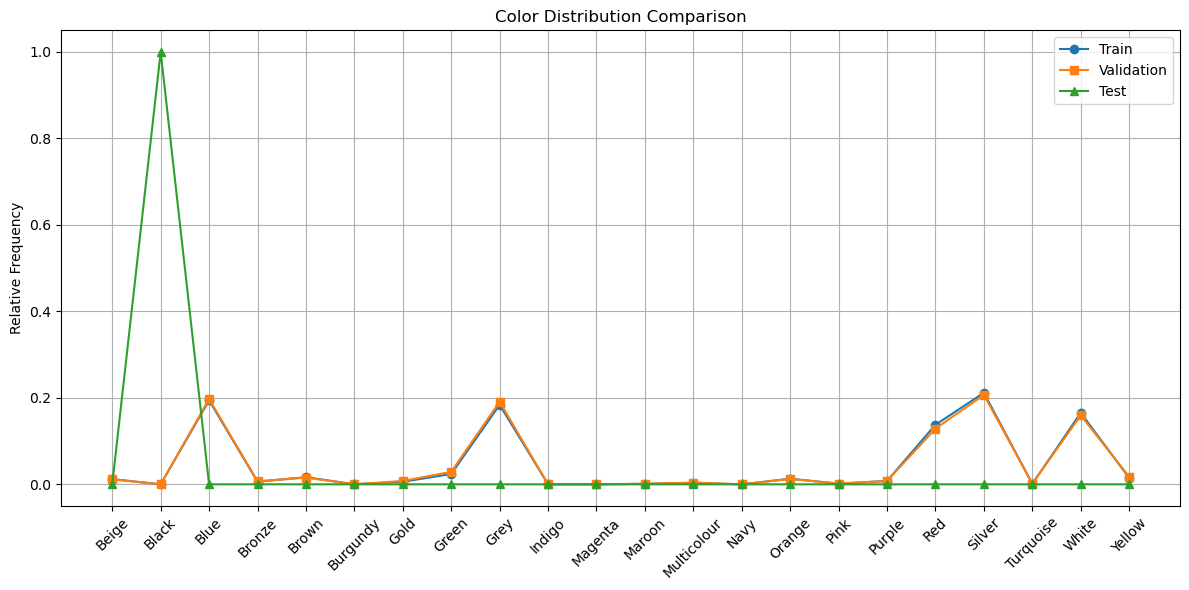

In [143]:
plot_compare_distribution(train_dist=train_no_black_dist, val_dist=val_no_black_dist, test_dist=test_only_black_dist, colors=colors)

### Train, Val: Only Black. Test: No Black

In [144]:
ratio = [0.1, 0.5]
train_only_black_df, val_only_black_df, test_no_black_df = create_shifted_splits(df=full_data_df, 
                                                                               split=[{"Color": "Black"}],
                                                                               ratio=ratio,
                                                                               mode=1)

display(train_only_black_df)
display(val_only_black_df)
display(test_no_black_df)

Shape of train df:	(16364, 17)
Shape of val df:	(17641, 17)
Shape of test df:	(34005, 17)
Total Size: 68010


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
10,10_3$$67,0.012811,-1.311853,0.876887,-1.051381,6.836808,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$67$$imag...,225
11,10_3$$68,0.012811,0.611842,0.876887,-1.160004,6.585951,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$68$$imag...,0
13,10_3$$72,0.012811,1.092766,0.876887,-1.033562,6.297332,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$72$$imag...,225
18,10_3$$94,-2.370628,2.054614,0.876887,-0.859414,6.755347,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$94$$imag...,315
32,10_3$$19,0.012811,0.611842,1.339829,-1.201629,9.830628,0.135216,0.61833,6.285820,2.739476,Black,10,0,1,0,Bentley$$Bentayga$$2018$$Black$$10_3$$19$$imag...,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176358,96_9$$365,0.012811,-0.350005,-1.669289,1.471409,-0.581523,0.135216,0.61833,-0.193123,0.147646,Black,4,1,1,285,Volvo$$V50$$2005$$Black$$96_9$$365$$image_0.jpg,0
176361,96_9$$399,0.012811,-1.792777,-1.669289,2.305643,-0.608497,0.135216,0.61833,-0.193123,-0.111537,Black,4,1,8,285,Volvo$$V50$$2005$$Black$$96_9$$399$$image_0.jpg,45
176373,96_9$$66,0.012811,1.092766,-1.437819,1.721020,-0.565069,0.135216,0.61833,-0.279830,0.147646,Black,4,1,1,285,Volvo$$V50$$2006$$Black$$96_9$$66$$image_0.jpg,270
176381,96_9$$198,0.012811,-0.350005,-1.437819,0.541764,-0.554280,0.135216,0.61833,-0.279830,0.147646,Black,4,1,1,285,Volvo$$V50$$2006$$Black$$96_9$$198$$image_0.jpg,45


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
9,10_3$$65,0.012811,-1.311853,0.876887,-0.921478,6.862433,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$65$$imag...,0
12,10_3$$69,0.012811,-1.311853,0.876887,-0.779438,6.243384,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$69$$imag...,225
15,10_3$$75,0.012811,-1.311853,0.876887,-0.921221,6.324306,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$75$$imag...,225
22,10_3$$112,0.012811,0.130919,0.876887,-0.445080,5.779166,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$112$$ima...,225
24,10_3$$126,0.012811,0.130919,0.876887,-1.047616,6.556011,0.135216,0.61833,6.285820,5.331307,Black,10,0,8,0,Bentley$$Bentayga$$2016$$Black$$10_3$$126$$ima...,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176325,96_9$$396,0.012811,-0.350005,-0.511936,0.563629,-0.419411,0.135216,0.61833,-0.187653,0.147646,Black,4,0,1,285,Volvo$$V50$$2010$$Black$$96_9$$396$$image_10.jpg,45
176328,96_9$$499,0.012811,1.092766,-0.511936,1.019472,-0.511122,0.135216,0.61833,-0.187653,-0.370720,Black,4,1,1,285,Volvo$$V50$$2010$$Black$$96_9$$499$$image_0.jpg,225
176347,96_9$$291,0.012811,-1.311853,-1.669289,2.181142,-0.598517,0.135216,0.61833,-0.193123,0.147646,Black,4,1,1,285,Volvo$$V50$$2005$$Black$$96_9$$291$$image_0.jpg,0
176351,96_9$$337,0.012811,0.611842,-1.669289,2.352413,-0.580984,0.135216,0.61833,-0.193123,0.147646,Black,4,1,1,285,Volvo$$V50$$2005$$Black$$96_9$$337$$image_0.jpg,0


,Adv_ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,Entry_price,Engine_size,Color,Bodytype,Gearbox,Fuel_type,Genmodel_ID,Image_name,Predicted_viewpoint
0,10_3$$1,0.012811,-1.311853,0.876887,-0.906021,6.323766,0.135216,0.61833,6.285820,5.331307,Grey,10,0,8,0,Bentley$$Bentayga$$2016$$Grey$$10_3$$1$$image_...,225
7,10_3$$47,0.012811,1.092766,0.876887,-1.101004,6.051870,0.135216,0.61833,6.285820,5.331307,Green,10,0,8,0,Bentley$$Bentayga$$2016$$Green$$10_3$$47$$imag...,0
25,10_3$$2,0.012811,-0.830929,1.339829,-1.192392,8.212201,0.135216,0.61833,6.285820,5.331307,Brown,10,0,8,0,Bentley$$Bentayga$$2018$$Brown$$10_3$$2$$image...,90
46,10_3$$40,0.012811,-0.830929,1.339829,-1.175789,7.133519,0.135216,0.61833,6.285820,2.739476,Silver,10,0,1,0,Bentley$$Bentayga$$2018$$Silver$$10_3$$40$$ima...,225
47,10_3$$42,0.012811,-1.311853,1.339829,-1.167020,7.915759,0.135216,0.61833,6.285820,2.739476,Grey,10,0,8,0,Bentley$$Bentayga$$2018$$Grey$$10_3$$42$$image...,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,96_9$$454,0.012811,0.611842,-1.437819,-0.219930,-0.446384,0.135216,0.61833,-0.279830,0.147646,Silver,4,1,1,285,Volvo$$V50$$2006$$Silver$$96_9$$454$$image_0.jpg,0
176402,96_9$$504,0.012811,1.092766,-1.437819,3.708739,-0.613730,0.135216,0.61833,-0.279830,0.147646,Grey,4,1,1,285,Volvo$$V50$$2006$$Grey$$96_9$$504$$image_0.jpg,225
176406,96_9$$283,0.012811,-0.830929,-1.900760,1.155174,-0.565069,0.135216,0.61833,-0.204064,0.666012,Red,4,0,8,285,Volvo$$V50$$2004$$Red$$96_9$$283$$image_1.jpg,315
176411,96_9$$457,0.012811,-0.350005,-1.900760,1.093532,-0.473358,0.135216,0.61833,-0.204064,0.666012,Grey,4,0,8,285,Volvo$$V50$$2004$$Grey$$96_9$$457$$image_0.jpg,45


In [145]:
train_only_black_dist = create_dist_dfs(df=train_only_black_df,
                                    cols=["Color"],
                                    fill_values=colors)
val_only_black_dist = create_dist_dfs(df=val_only_black_df,
                                    cols=["Color"],
                                    fill_values=colors)
test_no_black_dist = create_dist_dfs(df=test_no_black_df,
                                    cols=["Color"],
                                    fill_values=colors)

In [146]:
train_test_kl_only_black = calc_JS(first_dist=train_only_black_dist, second_dist=test_no_black_dist)
train_test_kl_only_black

0.642933379852313

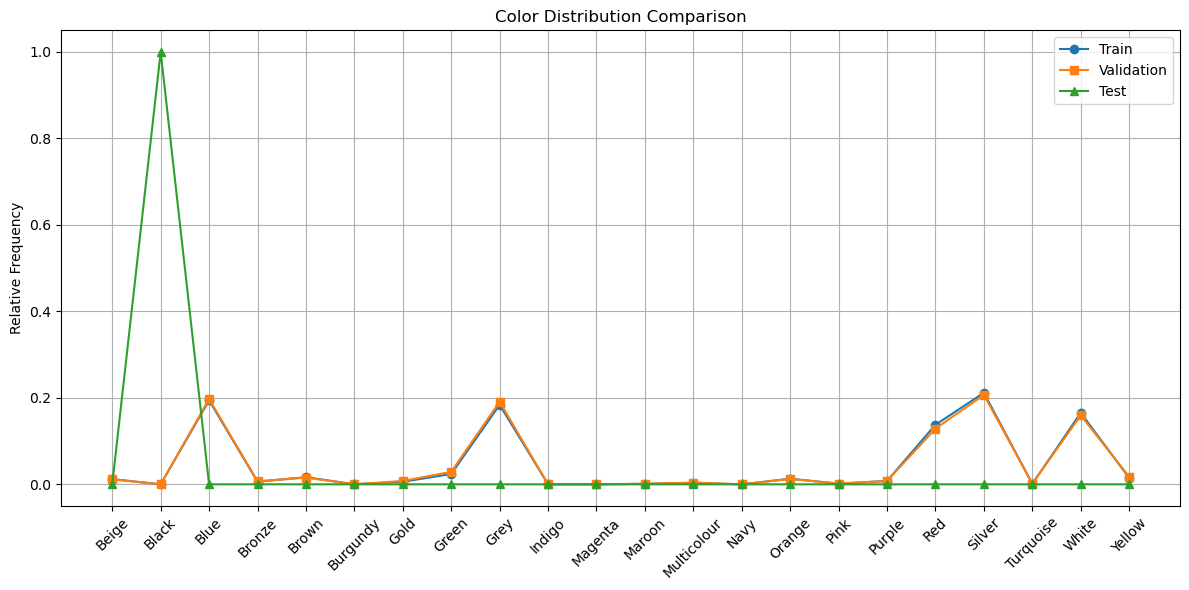

In [147]:
plot_compare_distribution(train_dist=train_no_black_dist, val_dist=val_no_black_dist, test_dist=test_only_black_dist, colors=colors)

In [ ]:
# TODO: save newly generated dataframes and create label files

dict_keys([31, 32, 254, 39, 257, 144, 189, 139, 42, 232, 256, 71, 253, 216, 37, 145, 68, 138, 226, 263, 149, 172, 127, 115, 174, 38, 12, 173, 119, 79, 191, 128, 146, 153, 184, 181, 151, 166, 186, 285, 276, 228, 4, 195, 91, 63, 47, 143, 179, 66, 114, 221, 268, 180, 169, 248, 111, 239, 141, 33, 35, 60, 236, 87, 284, 26, 245, 77, 125, 19, 43, 1, 132, 261, 175, 137, 113, 40, 52, 61, 281, 157, 80, 159, 22, 53, 255, 14, 8, 49, 183, 78, 34, 58, 129, 237, 69, 200, 277, 67, 241, 247, 193, 65, 9, 238, 15, 231, 280, 86, 72, 162, 210, 25, 220, 265, 167, 16, 74, 168, 109, 30, 272, 124, 240, 201, 84, 194, 190, 260, 218, 98, 73, 208, 198, 20, 97, 235, 249, 95, 75, 165, 121, 96, 182, 229, 234, 48, 105, 264, 274, 230, 258, 82, 188, 140, 116, 150, 185, 223, 242, 6, 81, 123, 76, 133, 45, 187, 136, 266, 152, 55, 106, 99, 164, 90, 89, 17, 155, 158, 93, 94, 148, 202, 217, 224, 233, 269, 225, 161, 197, 251, 57, 176, 107, 278, 282, 112, 108, 275, 192, 5, 101, 273, 204, 271, 50, 160, 7, 18, 243, 64, 270, 36, 2

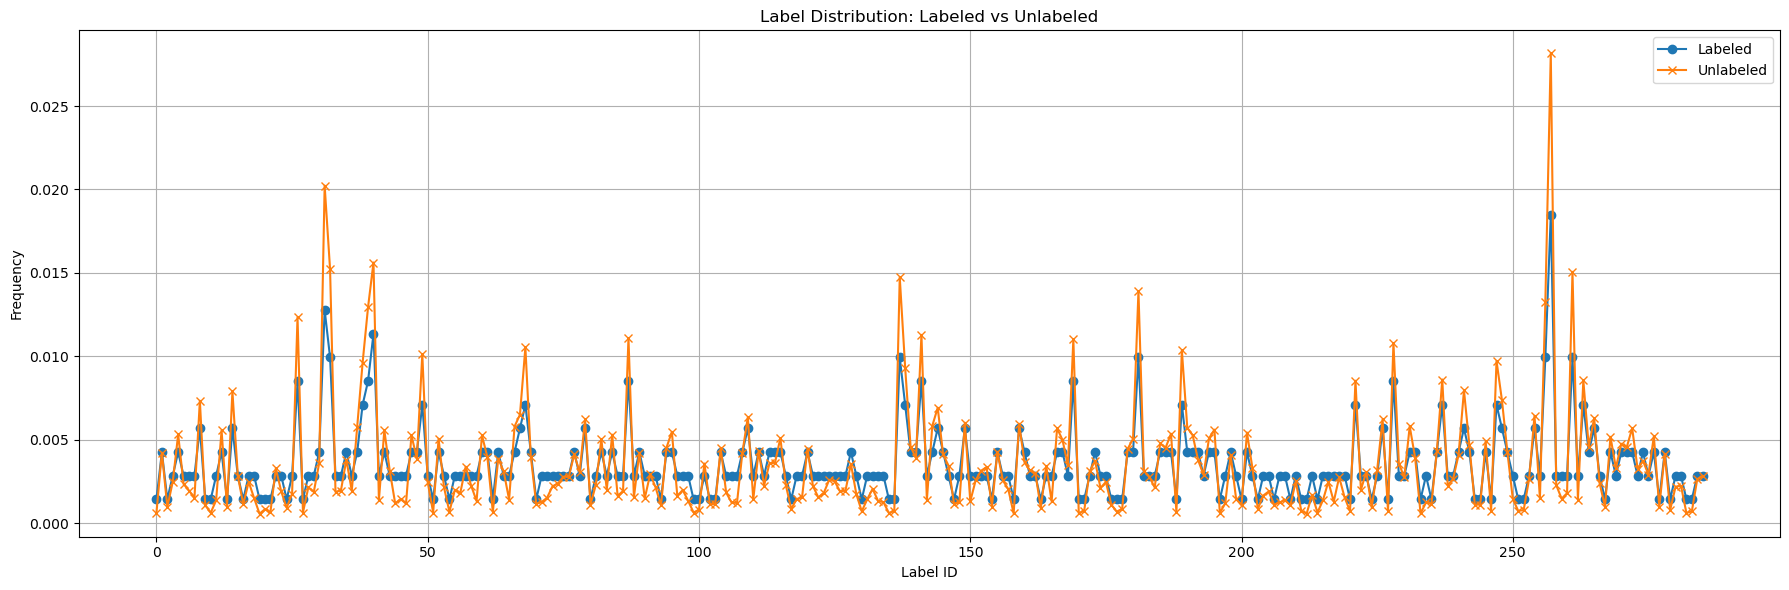

In [148]:
import torch
all_lables_path = os.path.join(FEATURES, "labels_model_all_train_all_views_0.01.pt")
all_unlables_path = os.path.join(FEATURES, "labels_model_all_train_all_views_0.99.pt")

label_data = torch.load(all_lables_path, map_location='cpu')

unlabel_data = torch.load(all_unlables_path, map_location='cpu')

from collections import Counter
label_counts = Counter(label_data)
unlabel_counts = Counter(unlabel_data)

# Get sorted list of all label IDs (for alignment)
print(unlabel_counts.keys())
all_labels = sorted(set(label_counts.keys()) | set(unlabel_counts.keys()))

# Create aligned frequency arrays
label_freqs = np.array([label_counts.get(l, 0) for l in all_labels])
unlabel_freqs = np.array([unlabel_counts.get(l, 0) for l in all_labels])

label_freqs_norm = label_freqs / label_freqs.sum()
unlabel_freqs_norm = unlabel_freqs / unlabel_freqs.sum()

print(f"Jensen-Shannon Divergence: {jensenshannon(label_freqs_norm, unlabel_freqs_norm)}")
print(f"KL-Divergence: {sum(kl_div(label_freqs_norm, unlabel_freqs_norm))}")


plt.figure(figsize=(18, 6))
plt.plot(all_labels, label_freqs_norm, label="Labeled", marker='o')
plt.plot(all_labels, unlabel_freqs_norm, label="Unlabeled", marker='x')
plt.title("Label Distribution: Labeled vs Unlabeled")
plt.xlabel("Label ID")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()